<a href="https://colab.research.google.com/github/ShanBore/Patient-Healthcare-Analysis/blob/main/Emr_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the emr dataset.
df = pd.read_csv('/content/emr_data.csv')

df.head()

,Patient ID,Age,Gender,Race,Primary Diagnosis,Secondary Diagnosis 1,Secondary Diagnosis 2,Medication,Procedure Code,Visit Date,...,Total Cost,Patient Satisfaction Score,Surgery Performed,Surgery Level,Insurance Coverage Percentage,Blood Pressure,Heart Rate,Temperature,Blood Glucose,Cholesterol
0,22c5a3eb-2f37-482e-9fd2-62aab3a27771,87,Male,White,M54.5,R10.9,NaN,Fluticasone,71020,2023-05-30,...,6709.010957,5,Yes,NaN,40.222393,103/71,91,98.0,106,222
1,289c3880-db41-4f01-acf2-699222996da7,63,Male,White,M54.5,NaN,NaN,Metformin,93000,2023-02-21,...,5245.663399,4,No,Major,56.676620,120/79,67,99.6,134,158
2,132cc8fc-2ea8-4a9a-8b51-6ea76735120c,61,Male,Other,E11.9,NaN,NaN,Metformin,99214,2024-01-05,...,4176.932553,2,Yes,Minimal,68.859316,127/77,79,98.5,88,192
3,f93fa55d-b321-48a0-8e6f-a35b709e8384,63,Male,Asian,J06.9,E11.9,NaN,Amlodipine,73630,2024-05-05,...,5074.307413,5,No,Mild,100.000000,93/70,62,98.4,92,253
4,e8a27feb-71e6-4d53-b7b3-8ff54456478c,50,Female,White,R10.9,NaN,NaN,Fluticasone,93000,2023-08-15,...,5143.343855,4,Yes,NaN,51.776883,125/56,48,98.3,105,203


In [32]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient ID                     10000 non-null  object 
 1   Age                            10000 non-null  int64  
 2   Gender                         10000 non-null  object 
 3   Race                           10000 non-null  object 
 4   Primary Diagnosis              10000 non-null  object 
 5   Secondary Diagnosis 1          2999 non-null   object 
 6   Secondary Diagnosis 2          1535 non-null   object 
 7   Medication                     10000 non-null  object 
 8   Procedure Code                 10000 non-null  int64  
 9   Visit Date                     10000 non-null  object 
 10  Discharge Date                 5000 non-null   object 
 11  Length of Stay                 10000 non-null  int64  
 12  Insurance Type                 10000 non-null  

,Age,Procedure Code,Length of Stay,Readmission,Total Cost,Patient Satisfaction Score,Insurance Coverage Percentage,Heart Rate,Temperature,Blood Glucose,Cholesterol
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.584700,76262.727700,2.495300,0.199300,7985.008211,3.956300,69.747778,69.489000,98.605840,99.283400,199.815900
std,19.594709,27163.215062,2.959367,0.399494,2939.867417,1.131423,14.695487,10.068447,0.705877,19.940819,40.543779
min,0.000000,20610.000000,0.000000,0.000000,500.000000,1.000000,9.483494,25.000000,96.000000,19.000000,50.000000
25%,36.000000,71020.000000,0.000000,0.000000,5960.028720,4.000000,59.631445,63.000000,98.100000,86.000000,172.000000
50%,49.000000,73630.000000,2.000000,0.000000,7987.873709,4.000000,69.590414,70.000000,98.600000,99.000000,200.000000
75%,63.000000,99213.000000,4.000000,0.000000,10027.674622,5.000000,80.102975,76.000000,99.100000,113.000000,227.000000
max,100.000000,99214.000000,28.000000,1.000000,15000.000000,5.000000,100.000000,103.000000,101.200000,177.000000,368.000000


Check for missing values.

In [33]:
# check for missing values.
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Patient ID                          0
Age                                 0
Gender                              0
Race                                0
Primary Diagnosis                   0
Secondary Diagnosis 1            7001
Secondary Diagnosis 2            8465
Medication                          0
Procedure Code                      0
Visit Date                          0
Discharge Date                   5000
Length of Stay                      0
Insurance Type                      0
Physician ID                        0
Hospital Department                 0
Source System                       0
Readmission                         0
Total Cost                          0
Patient Satisfaction Score          0
Surgery Performed                   0
Surgery Level                    6232
Insurance Coverage Percentage       0
Blood Pressure                      0
Heart Rate                          0
Temperature                         0
Blood Glucose     

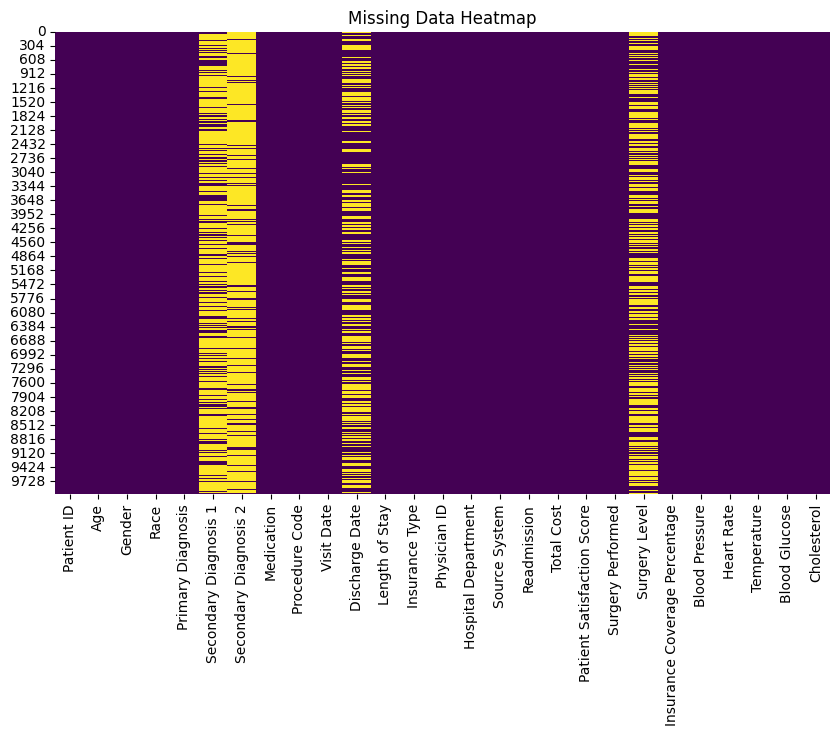

In [34]:
# visualize missing data with a heatmap.
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [35]:
# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [36]:
# remove duplicate data
df = df.drop_duplicates()

# **Lets explore the numerical features.**

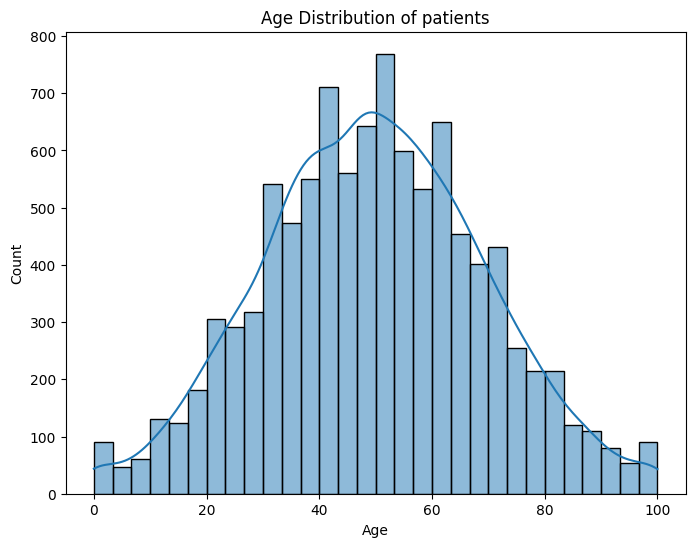

In [37]:
# visualize the Age Distribution of patients.
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of patients')
plt.show()

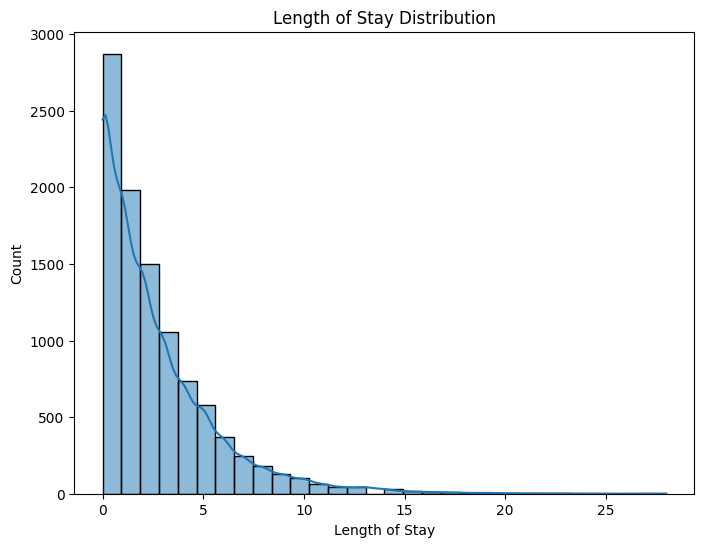

In [38]:
# Length of Stay Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Length of Stay'].dropna(), bins=30, kde=True)
plt.title('Length of Stay Distribution')
plt.show()


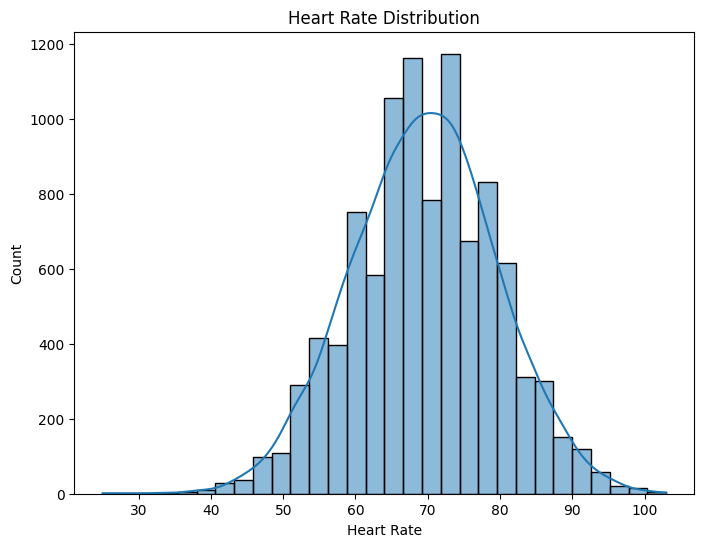

In [39]:
# Heart Rate Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Heart Rate'].dropna(), bins=30, kde=True)
plt.title('Heart Rate Distribution')
plt.show()

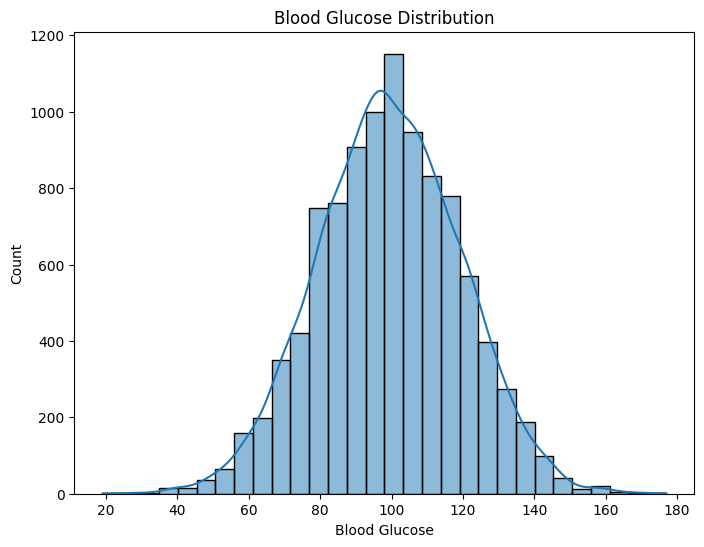

In [40]:
# Blood Glucose Distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Blood Glucose'].dropna(), bins=30, kde=True)
plt.title('Blood Glucose Distribution')
plt.show()

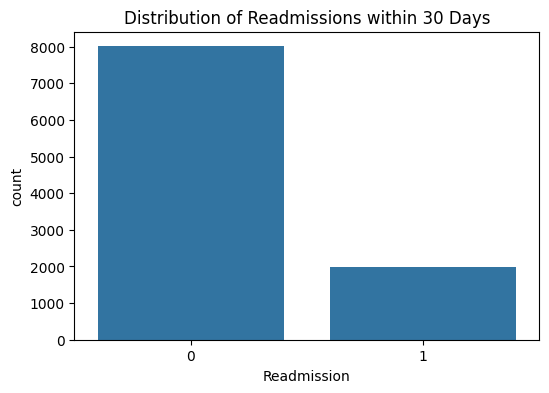

In [42]:
# Visualize readmissions
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Readmission')
plt.title('Distribution of Readmissions within 30 Days')
plt.show()

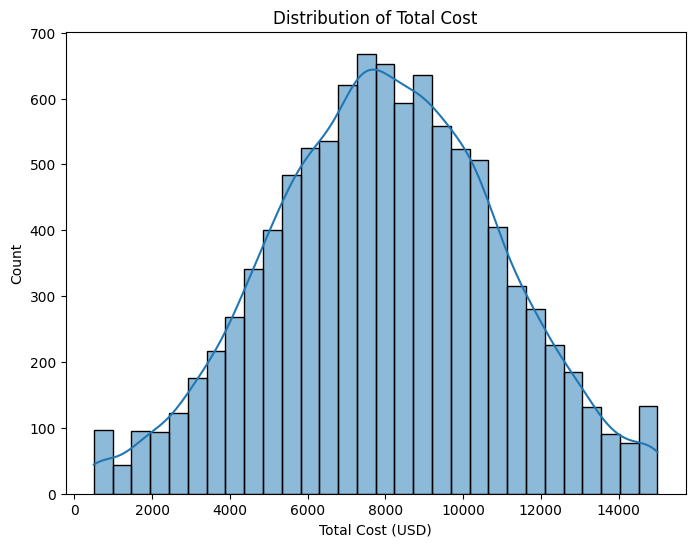

In [43]:
# Visualize TotalCost distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Cost'], bins=30, kde=True)
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost (USD)')
plt.show()

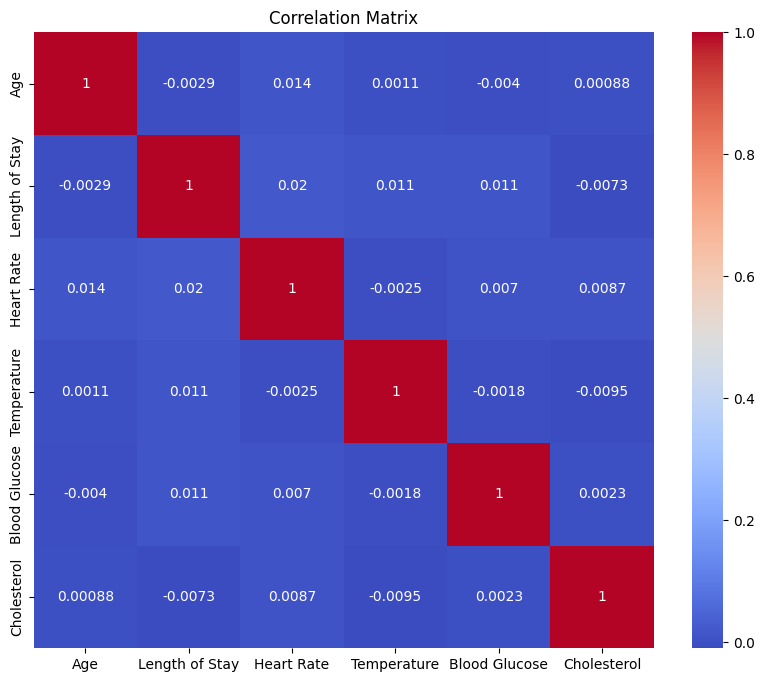

In [44]:
# Correlation matrix numerical features.
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Length of Stay', 'Heart Rate', 'Temperature', 'Blood Glucose', 'Cholesterol']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Now we explore the categorical features.**

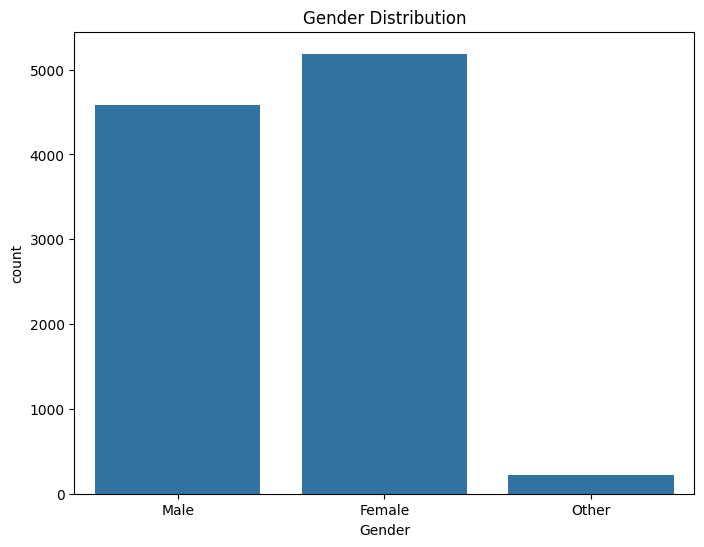

In [45]:
# Gender Distribution.
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

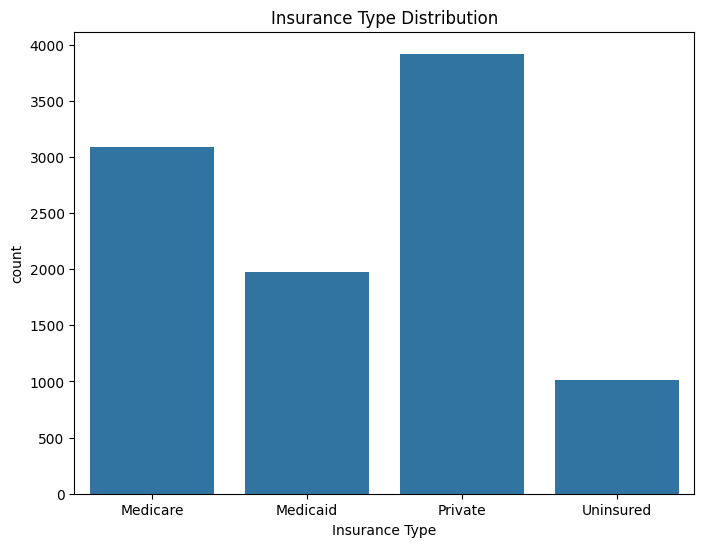

In [46]:
# Insurance Type Distribution.
plt.figure(figsize=(8, 6))
sns.countplot(x='Insurance Type', data=df)
plt.title('Insurance Type Distribution')
plt.show()

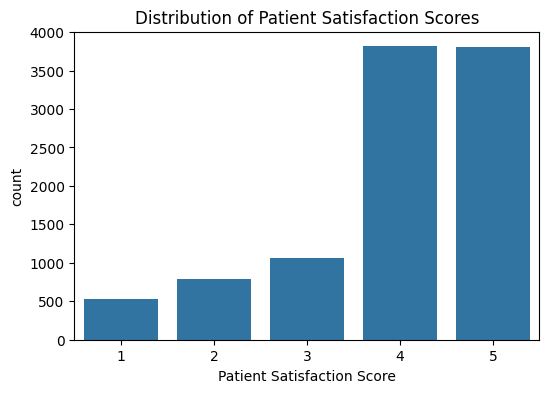

In [47]:
# Visualize PatientSatisfactionScore
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Patient Satisfaction Score')
plt.title('Distribution of Patient Satisfaction Scores')
plt.show()

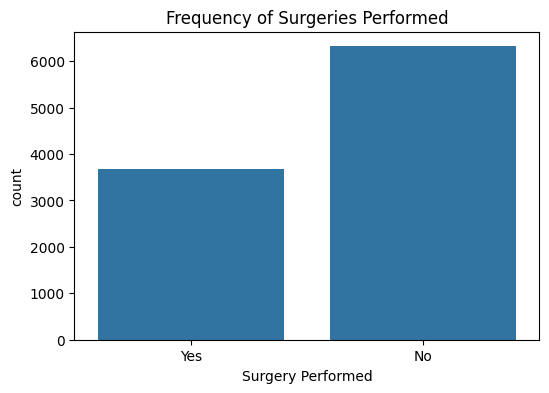

In [48]:
# Visualize SurgeryPerformed
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Surgery Performed')
plt.title('Frequency of Surgeries Performed')
plt.show()


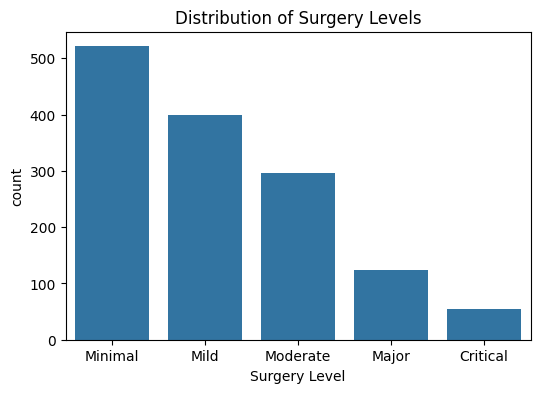

In [49]:
# Visualize SurgeryLevel
plt.figure(figsize=(6, 4))
sns.countplot(data=df[df['Surgery Performed'] == 'Yes'], x='Surgery Level')
plt.title('Distribution of Surgery Levels')
plt.show()

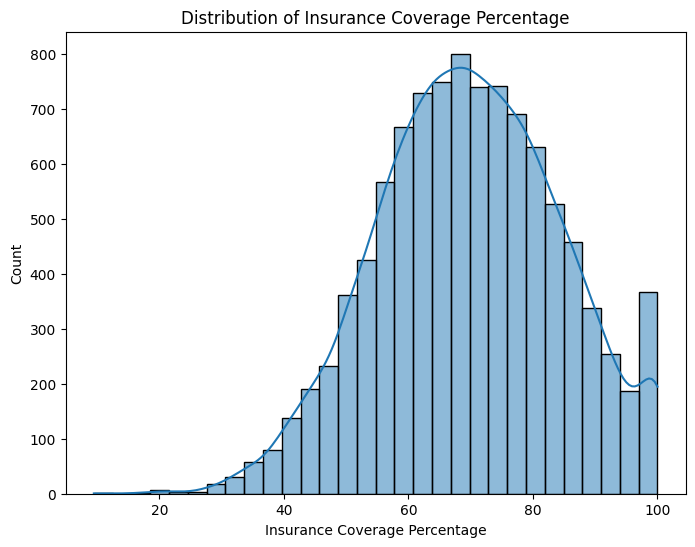

In [51]:
# Visualize InsuranceCoveragePercentage
plt.figure(figsize=(8, 6))
sns.histplot(df['Insurance Coverage Percentage'], bins=30, kde=True)
plt.title('Distribution of Insurance Coverage Percentage')
plt.xlabel('Insurance Coverage Percentage')
plt.show()

In [52]:
# Analyzing typos or inconsistencies in categorical data.
print("\nUnique values in 'Gender' column:")
print(df['Gender'].unique())

print("\nUnique values in 'Race' column:")
print(df['Race'].unique())


Unique values in 'Gender' column:
['Male' 'Female' 'Other']

Unique values in 'Race' column:
['White' 'Other' 'Asian' 'Black or African American' 'Hispanic or Latino']
